### Implementing simple Chatbot Using LangGraph

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START ,END
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [7]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': None, 'id': 'chatcmpl-Btd5YlXAUQKtKmoSydCn8Xd7kihEF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8a670274-d90b-486d-ad88-160aeb830f95-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Suman and i like to play cricket")

AIMessage(content="<think>\nOkay, the user is Suman and he likes to play cricket. Let me start by greeting him and showing enthusiasm about his interest. I should ask him about his favorite team or player to keep the conversation going. Maybe mention some popular players from different countries to cover a range. Also, ask if he plays any specific position or role in the game. That could help in suggesting practice tips or strategies. I should keep the tone friendly and supportive, encouraging him to share more about his experiences with cricket.\n</think>\n\nHey Suman! 🏏 That's awesome—cricket is such a thrilling game to play and watch. I'd love to hear more about your passion for it! Do you follow any particular team or player? Are you more into batting, bowling, or fielding? Also, do you play locally or just follow the sport? Let me know—I’d be happy to discuss strategies, techniques, or even fun cricket trivia! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completio

###  Creating Nodes

In [11]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

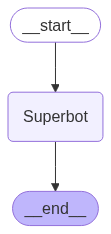

In [12]:
graph=StateGraph(State)

##node
graph.add_node("Superbot",superbot)

##Add edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile()

##Display
from IPython.display import Image ,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [14]:
##Invocation
graph_builder.invoke({"messages":"Hi Iam suman vemula ,Ilike to read books"})

{'messages': [HumanMessage(content='Hi Iam suman vemula ,Ilike to read books', additional_kwargs={}, response_metadata={}, id='74716189-d8b2-445e-82f7-2971e3d527c1'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Suman Vemula and mentioned they like reading books. I should respond warmly and engage them in a friendly conversation. First, I'll thank them for introducing themselves and then ask about the types of books they enjoy. It's important to keep the tone positive and encouraging. Maybe add an emoji to keep it light. Let me make sure the questions are open-ended so they can elaborate. Also, I should check if there's anything else they want to share about their reading habits. Avoid any technical jargon and keep the response simple and approachable.\n</think>\n\nHi Suman! 👋 Thank you for introducing yourself. It's wonderful that you enjoy reading books—what genres or types of books are you most drawn to? I'd love to hear about your favorite authors or books 

#### Streaming The responses

In [15]:
for event in graph_builder.stream({"messages":"Hello my name is suman"}):
    print(event)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced themselves as Suman. I should respond in a friendly and welcoming manner. Maybe ask how I can assist them today. Keep it open-ended so they can specify their needs. Make sure to use their name to personalize the interaction. Check for any previous interactions, but since this is new, just start fresh. Use simple and clear language. Avoid any technical jargon unless needed. Ensure the tone is positive and helpful. Alright, let's put that together.\n</think>\n\nHello Suman! Nice to meet you. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 14, 'total_tokens': 134, 'completion_time': 0.267602842, 'prompt_time': 0.000449314, 'queue_time': 0.053456035, 'total_time': 0.268052156}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_f17c2eb555', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run-